In [443]:
#Data set insertion

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('dark_background')

GOOGLE=pd.read_csv("data set/GOOGLE.csv", index_col='Date',parse_dates=True)['Close'][::-1]
APPLE=pd.read_csv("data set/APPLE.csv", index_col='Date',parse_dates=True)['Close'][::-1]
TESLA=pd.read_csv("data set/TESLA.csv", index_col='Date',parse_dates=True)['Close'][::-1]
MICROSOFT=TESLA=pd.read_csv("data set/MICROSOFT.csv", index_col='Date',parse_dates=True)['Close'][::-1]
#returns, logreturns, and weights calculation
retail=pd.concat([GOOGLE,APPLE,TESLA,MICROSOFT],axis=1)
retail.columns=['GOOGLE', 'APPLE','TESLA','MICROSOFT']
logreturns=np.log(1+retail.pct_change(1)).dropna()

In [444]:
#SHARPE ratio.
def SHARPE(df,risk_free_rate=0):
    mean_return=df.mean()
    std=df.std()
    SR=(mean_return-risk_free_rate)/std
    return SR*(252**0.5)

#sortino ratio
def SORTINO(df,threshold=0, risk_free_rate=0):
    mean_return=df.mean()
    #downside is the negative volitality in stock
    downside=df[df<threshold].std()
    SR=(mean_return-risk_free_rate)/downside
    return SR*(252**0.5)

#probabilistic sharpe ratio.
def pSHARPE(df, benchmark=0):
    sr=SHARPE(df)
    #skew and kurtosis
    s=scipy.stats.skew(df)
    k=scipy.stats.kurtosis(df, fisher=True)
    n=len(df)
    sigmasr= ((1/(n-1))*(1+0.5*(sr**2)-s*sr+(k*sr)/4))**0.5
    fratio=(sr-benchmark)/sigmasr
    psr=scipy.stats.norm.cdf(fratio)
    return psr*(252**0.5)

In [445]:
#calculating returns
def cal_returns(weights,logreturns):
    return np.sum(logreturns.mean()*weights)*(252**2)/100


#porfolio volitality for Variance.
clr=logreturns.cov()
def cal_volitality(weights, clr):
    annual_cov=np.dot(clr*252, weights)
    volitality = np.dot(weights.transpose(), annual_cov)
    return np.sqrt(volitality)

#calculating weights for monte carlo simulation
def weights(N):
    W=np.random.random(N)
    return W/sum(W)

In [453]:
#running montecarlo simulation for getting an efficient portfolio division

montecarlo_portfolio_returns, montecarlo_volitality, montecarlo_weights=[],[],[]
for i in range(10000):
    w=weights(4)
    montecarlo_weights.append(w)
    montecarlo_portfolio_returns.append(cal_returns(w,logreturns))
    montecarlo_volitality.append(cal_volitality(w,clr))
mc_sharpe=np.array((montecarlo_portfolio_returns)/np.array(montecarlo_volitality))
ms=mc_sharpe[np.argmax(mc_sharpe)]

(Text(0.5, 0, 'VOLITALITY'), Text(0, 0.5, 'RETURNS'))

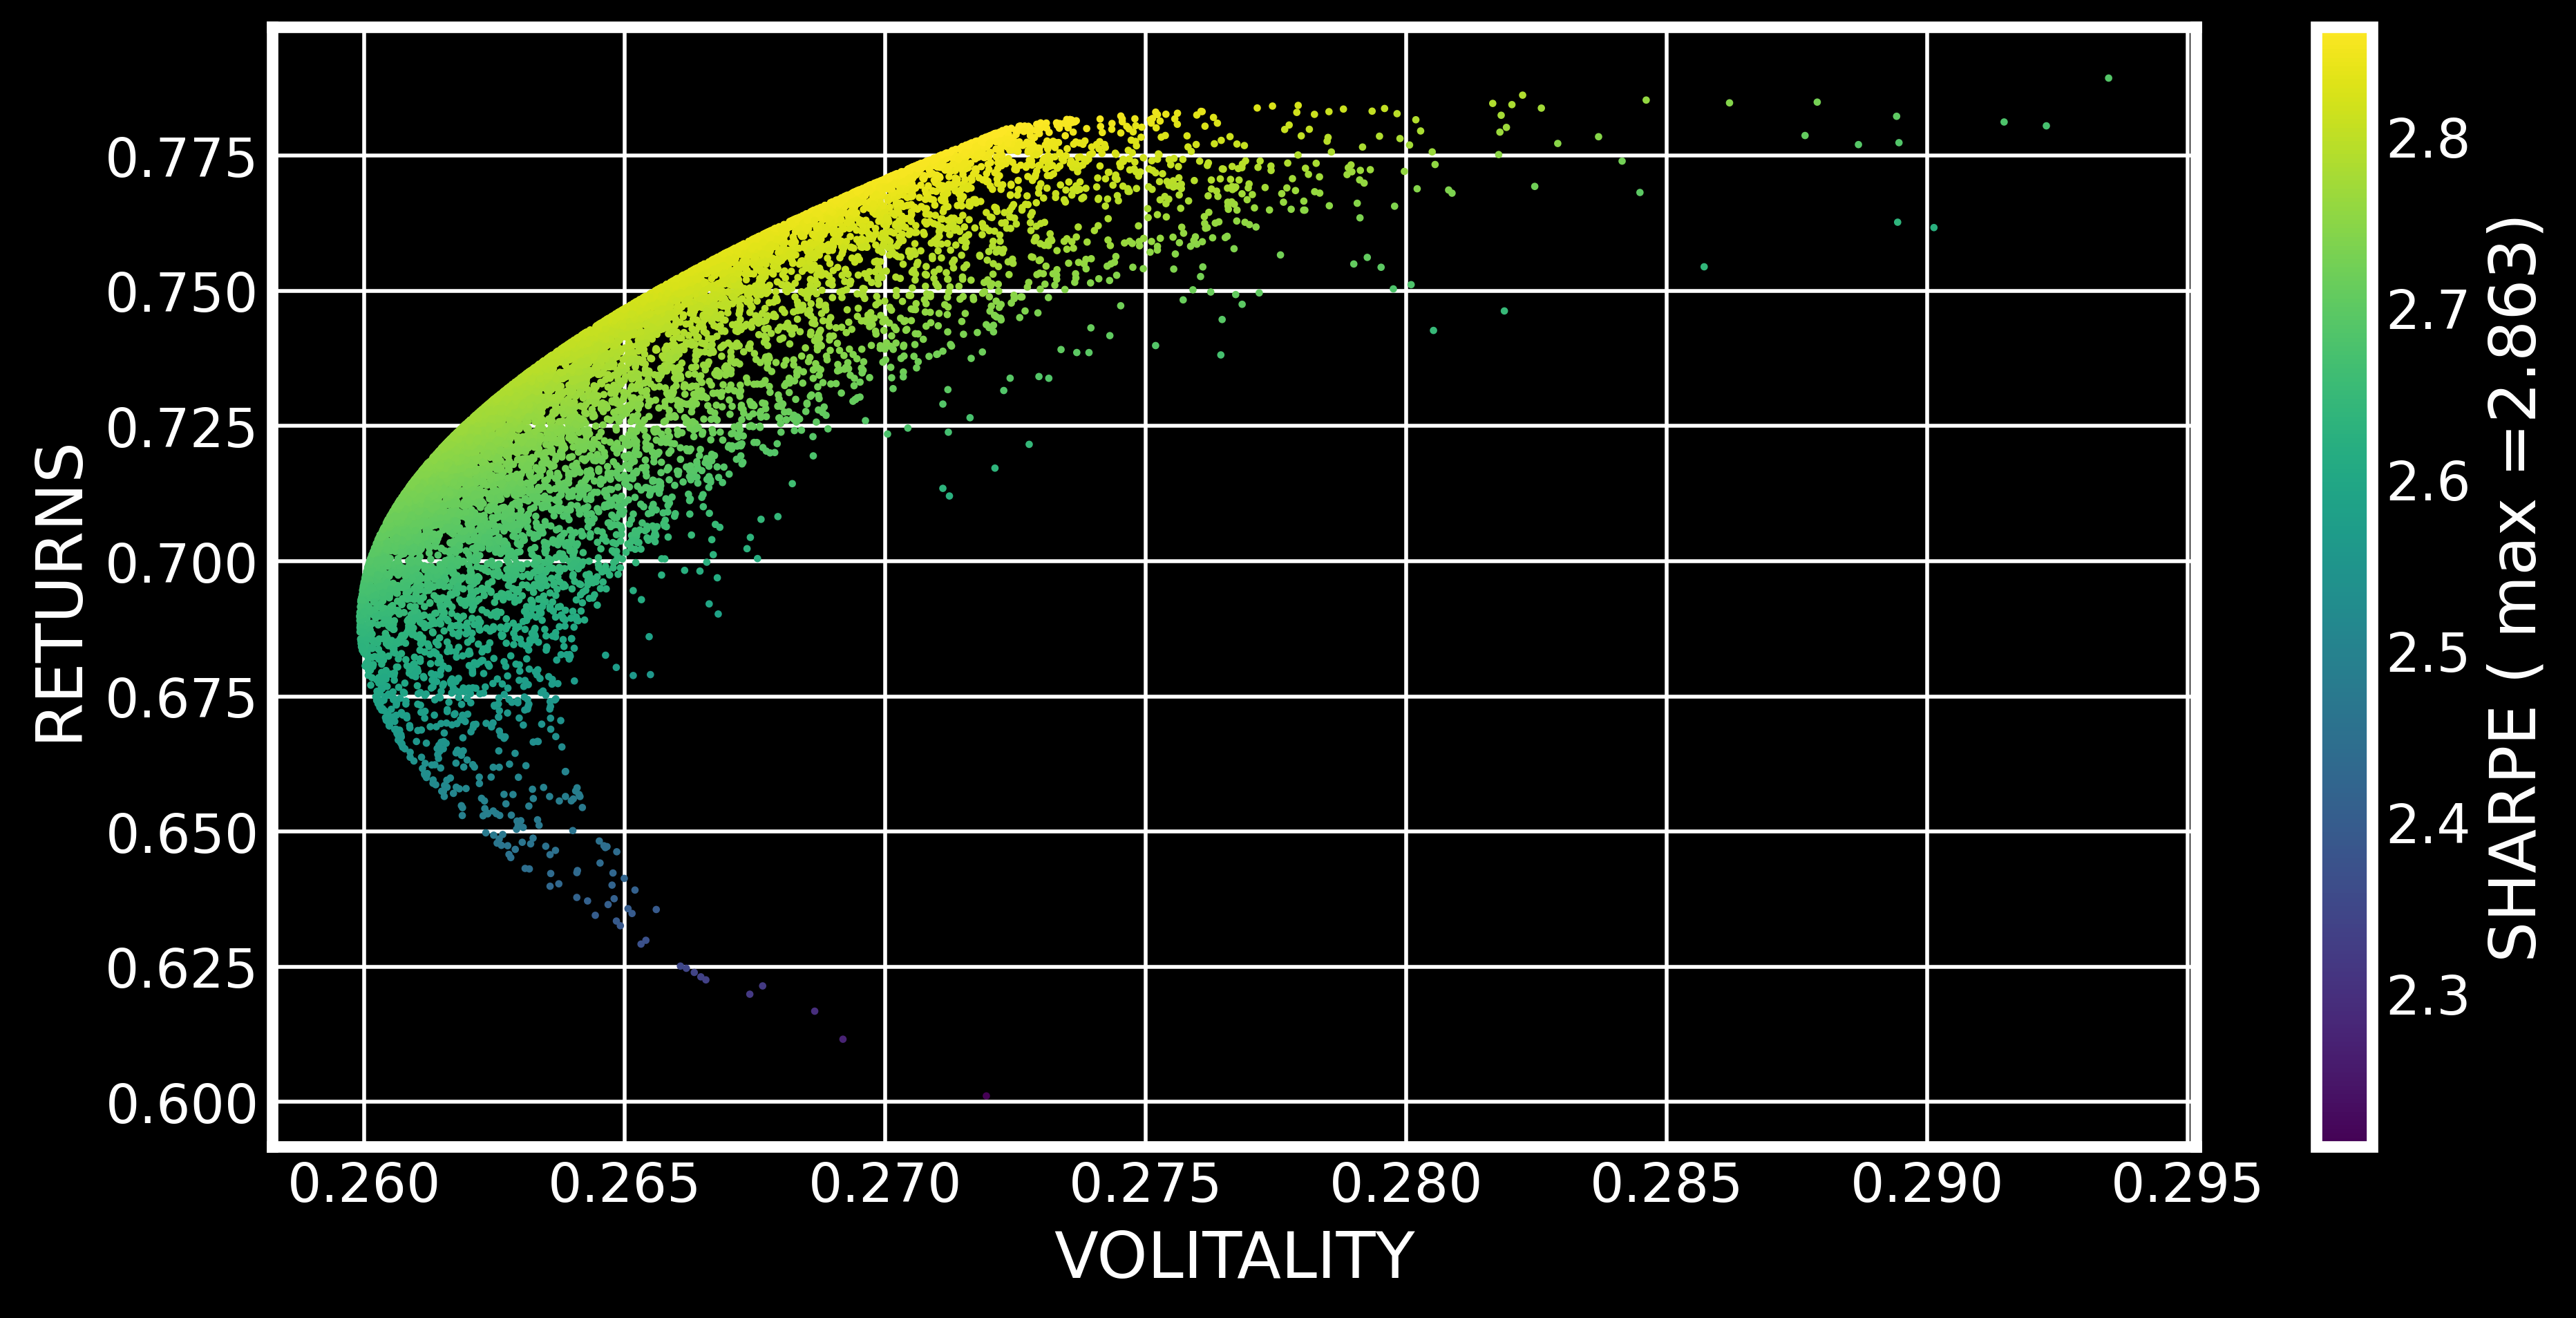

In [456]:
#potting our simulation
plt.figure(dpi=400, figsize=(10,5))
plt.scatter(montecarlo_volitality,montecarlo_portfolio_returns, c=mc_sharpe, s=2)
plt.colorbar(label="SHARPE ( max ="+str(ms)[:5]+")")
plt.xlabel('VOLITALITY'),plt.ylabel("RETURNS")